<h1> A propos des données </h1>
Donné artificielle cos.

<h1>Importation et Prétraitement des Données :</h1> Les données de la première session du premier sujet sont chargées à partir du Dataset 2a. Les segments correspondant à chaque classe (left hand, right hand, tongue, feet) sont extraits de la  première session du premier run du premier sujet.

In [8]:
import numpy as np
import mne

# Définir les paramètres
fs = 1000  # Fréquence d'échantillonnage (Hz)
T = 10  # Durée du signal (s)
t = np.arange(0, T, 1/fs)  # Temps
f = 1  # Fréquence du cosinus (Hz)

# Générer les signaux pour plusieurs canaux
num_channels = 3
signals = []
for i in range(num_channels):
    signal = 10 + np.cos(2 * np.pi * f * t + i*np.pi/3)  # Phase différente pour chaque canal
    signals.append(signal)

# Assurez-vous que signals_array a la bonne forme
signals_array = np.array(signals)

# Créer un objet RawArray avec les signaux artificiels
info = mne.create_info(ch_names=[f'channel_{i}' for i in range(num_channels)], sfreq=fs, ch_types=['misc']*num_channels)
raw = mne.io.RawArray(signals_array, info)




Creating RawArray with float64 data, n_channels=3, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


In [9]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: channel_0, channel_1, channel_2
 chs: 3 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 3
 projs: []
 sfreq: 1000.0 Hz
>


In [10]:
print(raw.get_data().shape)

(3, 10000)


In [13]:
np.cov(raw.get_data())

array([[ 0.50005001,  0.250025  , -0.250025  ],
       [ 0.250025  ,  0.50005001,  0.250025  ],
       [-0.250025  ,  0.250025  ,  0.50005001]])

In [11]:
print(raw.get_data())

[[11.         10.99998026 10.99992104 ... 10.99982235 10.99992104
  10.99998026]
 [10.5        10.49454877 10.48907801 ... 10.5162344  10.51084303
  10.50543149]
 [ 9.5         9.49456851  9.48915697 ...  9.51641205  9.51092199
   9.50545123]]


Using matplotlib as 2D backend.


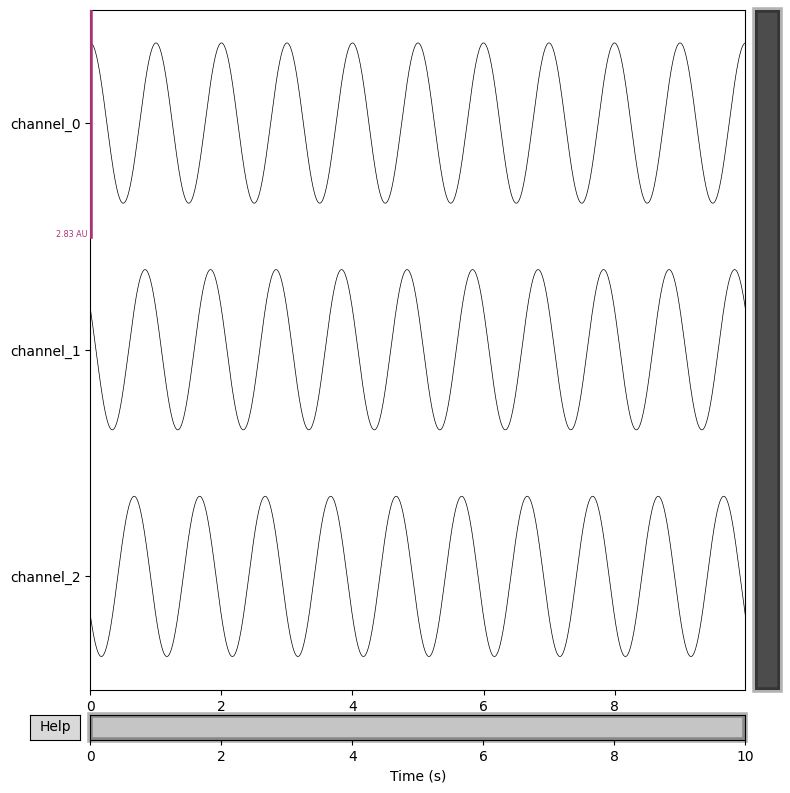

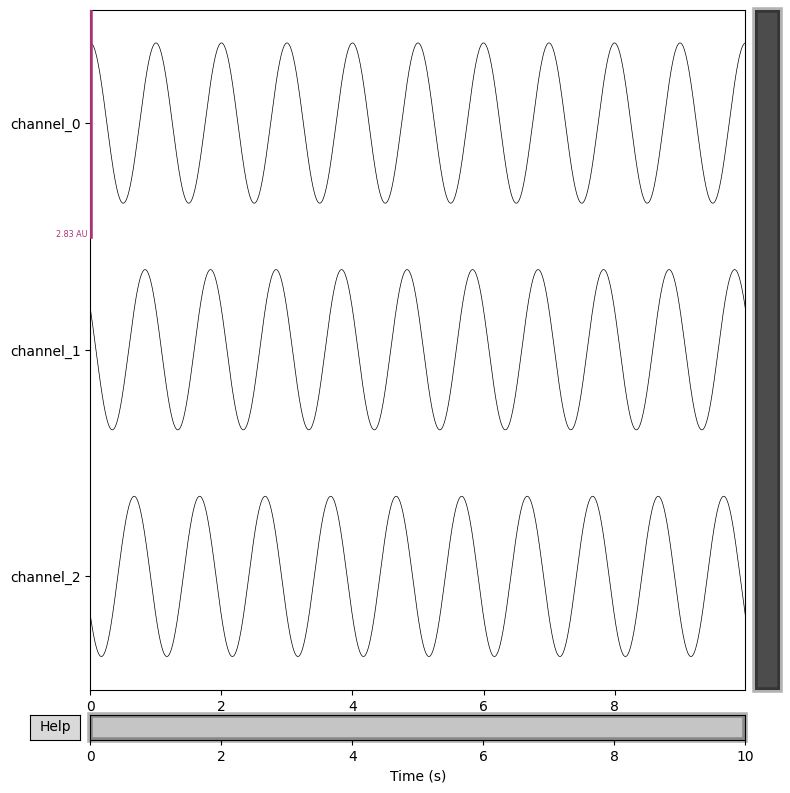

In [5]:
raw.plot(duration=15, n_channels=26)

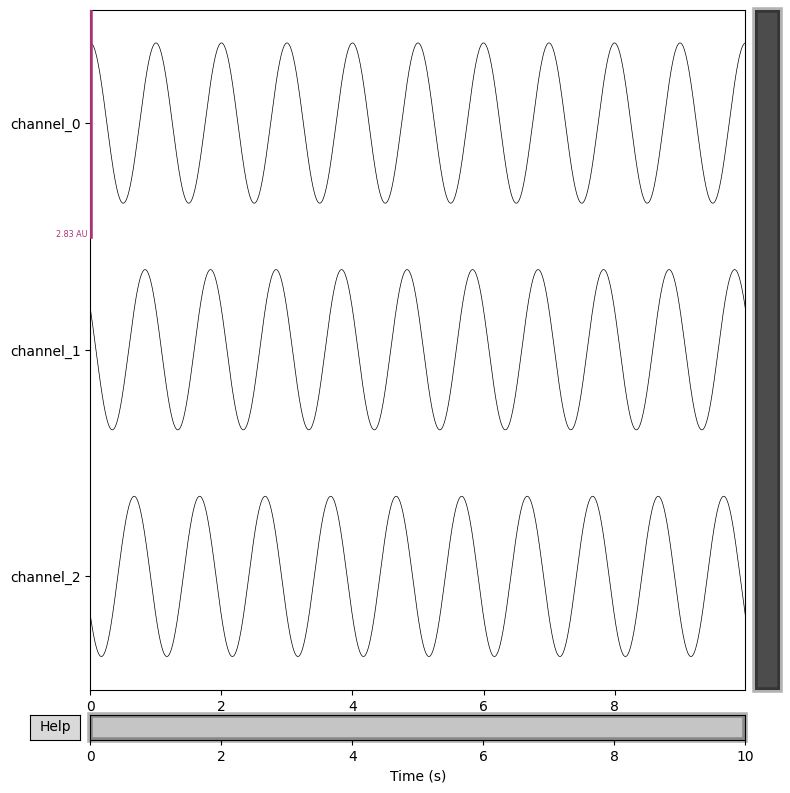

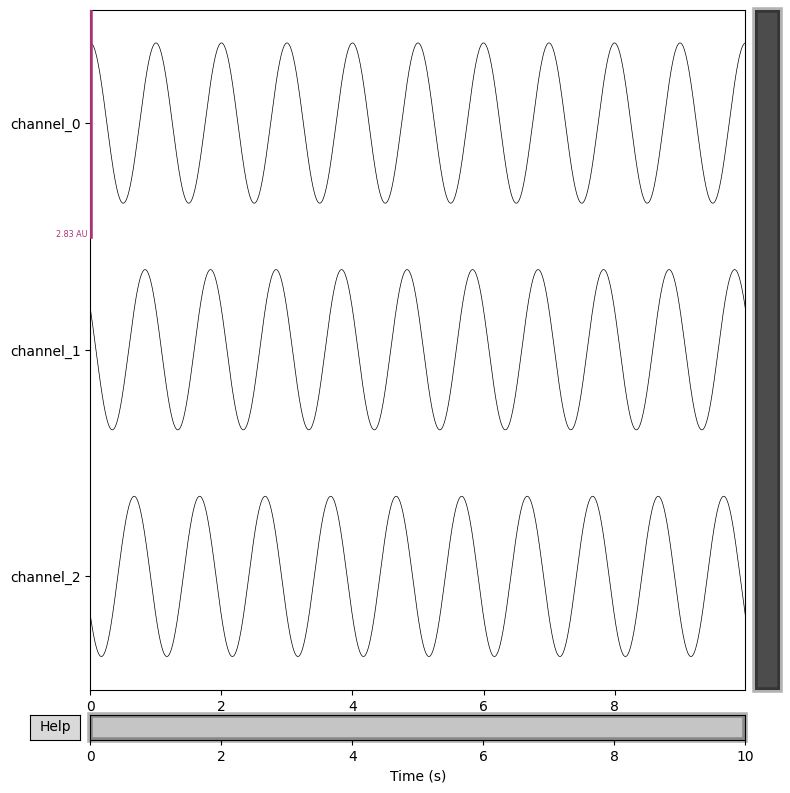

In [6]:
raw.plot(duration=40, n_channels=26)

<h1>Calcul de la Covariance :</h1> 
À partir des données EEG, la covariance est calculée toutes les deux secondes. Cela permet de capturer les relations linéaires entre les différentes électrodes à travers le temps.
Il existe plusieur méthode dans mne pourle calcule de la covariance parmis ces méthodes il  y'a la méthode empirique ainsi que ‘diagonal_fixed’, ‘shrunk’, ‘oas’, ‘ledoit_wolf’, ‘factor_analysis’, ‘shrinkage’. Dans cette exemple je vais utiliser la méthode empirique.

In [12]:
cov = mne.compute_raw_covariance(raw, tmin=55, tmax=60,method='empirical')

ValueError: No events produced, check the values of start, stop, and duration

In [ ]:
print(cov.data.shape)

(14, 14)


In [ ]:
print(cov.data)

[[3.60083160e-09 3.26104483e-09 1.03526494e-09 9.46611999e-10
  1.01459988e-09 7.77462739e-10 6.93554398e-10 6.97474302e-10
  5.83723594e-10 4.78726267e-10 5.08999046e-10 3.13383498e-10
  2.96324644e-10 2.97813734e-10]
 [3.26104483e-09 3.07273439e-09 9.76721449e-10 8.69336197e-10
  9.71303856e-10 7.06003173e-10 6.16171124e-10 6.62669705e-10
  4.95304970e-10 3.65017000e-10 4.56118235e-10 2.31862700e-10
  2.28952043e-10 2.37055352e-10]
 [1.03526494e-09 9.76721449e-10 3.62570243e-10 3.18711834e-10
  3.38997308e-10 2.71894890e-10 2.40463816e-10 2.35272025e-10
  1.98493082e-10 1.54038123e-10 1.69708517e-10 9.74808078e-11
  9.79219502e-11 1.00619780e-10]
 [9.46611999e-10 8.69336197e-10 3.18711834e-10 3.16228238e-10
  3.18623436e-10 2.58768748e-10 2.51228377e-10 2.29930098e-10
  2.08046594e-10 1.94032857e-10 1.79925549e-10 1.16868034e-10
  1.14785094e-10 1.19385220e-10]
 [1.01459988e-09 9.71303856e-10 3.38997308e-10 3.18623436e-10
  3.58919017e-10 2.56968527e-10 2.36791262e-10 2.58607792e-10


In [ ]:
print(raw)

<RawArray | 1 x 10000 (10.0 s), ~84 kB, data loaded>


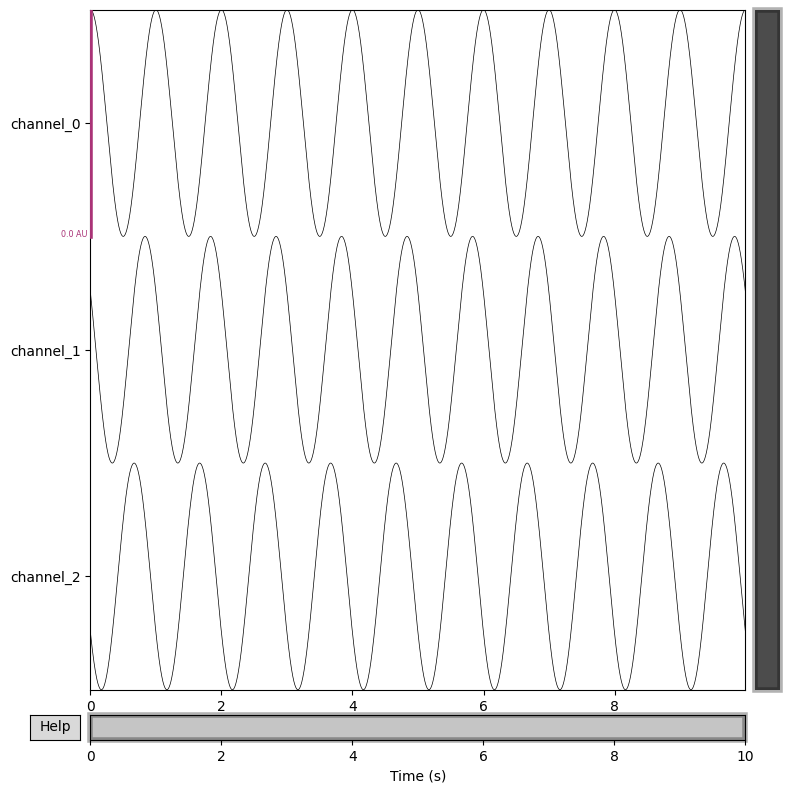

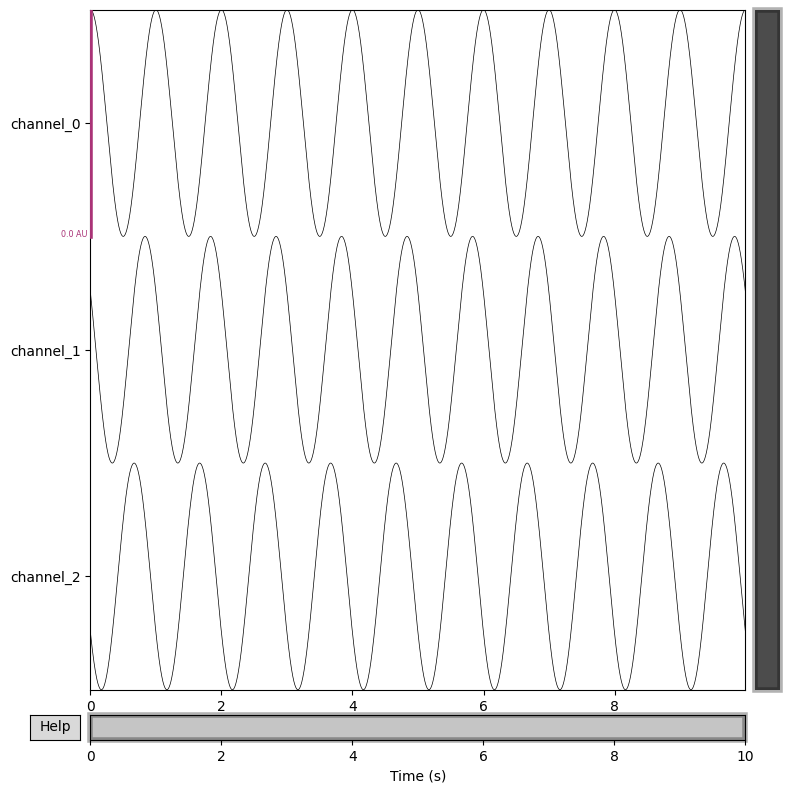

In [ ]:
raw.plot(duration=10, n_channels=5)

In [ ]:
print(raw.get_data().shape)

(3, 10000)


In [ ]:
print(raw.get_data())

In [ ]:
print(cov.data)

[[ 5.00050005e-01 -2.84245519e-18 -2.84245519e-18 -2.13184139e-17
  -4.33474416e-17]
 [-2.84245519e-18  5.00050005e-01  0.00000000e+00 -5.68491038e-18
  -3.55306899e-18]
 [-2.84245519e-18  0.00000000e+00  5.00050005e-01 -2.13184139e-17
   3.19065595e-16]
 [-2.13184139e-17 -5.68491038e-18 -2.13184139e-17  5.00050005e-01
   4.12156002e-17]
 [-4.33474416e-17 -3.55306899e-18  3.19065595e-16  4.12156002e-17
   5.00050005e-01]]


In [ ]:
import numpy as np
import mne

# Définir les paramètres
fs = 1000  # Fréquence d'échantillonnage (Hz)
T = 10  # Durée du signal (s)
t = np.arange(0, T, 1/fs)  # Temps
f = 1  # Fréquence du cosinus (Hz)

# Générer les signaux pour plusieurs canaux
num_channels = 3
signals = []
for i in range(num_channels):
    signal = 10 + np.cos(2 * np.pi * f * t + i*np.pi/3)  # Phase différente pour chaque canal
    signals.append(signal)

# Assurez-vous que signals_array a la bonne forme
signals_array = np.array(signals)

# Créer un objet RawArray avec les signaux artificiels
info = mne.create_info(ch_names=[f'channel_{i}' for i in range(num_channels)], sfreq=fs, ch_types=['misc']*num_channels)
raw = mne.io.RawArray(signals_array, info)

# Convertir Raw en Epochs
#events = np.array([[0, 0, 1]])  # Créer un événement arbitraire
#events_id = {1: 1}  # Définir les ID d'événement comme entiers
#epochs = mne.EpochsArray(signals_array[np.newaxis, ...], info, events, tmin=0, event_id=events_id)

# Calculer la covariance
cov = mne.compute_raw_covariance(raw, tmin=0, tmax=4,method='empirical')
# Vérifier que la covariance est valide
print("Covariance calculée avec succès :")
print("Moyenne de la covariance :", np.mean(cov.data))


Creating RawArray with float64 data, n_channels=3, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.
Using up to 20 segments
Number of samples used : 4000
[done]
Covariance calculée avec succès :
Moyenne de la covariance : nan


c:\Users\ja_to\anaconda3\envs\MyTestEnv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ja_to\anaconda3\envs\MyTestEnv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


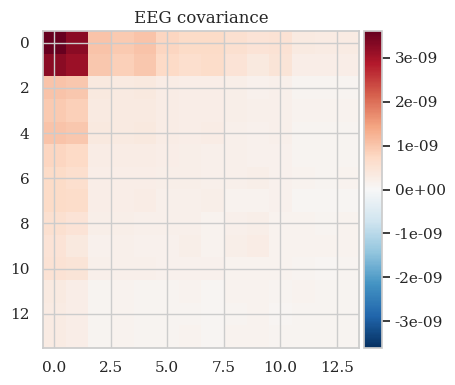

(<Figure size 380x370 with 2 Axes>, None)

In [ ]:
mne.viz.plot_cov(cov, raw.info, show_svd=False)